# Predição de Salário a partir dos Anos de Experiência

1. Carrega o dataset `Salary_dataset.csv`.
2. Faz uma análise exploratória simples.
3. Separa os dados em treino e teste.
4. Cria um modelo de **Regressão Linear**.
5. Avalia o modelo.
6. Faz previsões de exemplo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Exibir gráficos dentro do notebook
%matplotlib inline

## 1. Carregar o dataset

In [ ]:
# Carrega o Dataset do Github
url = "https://raw.githubusercontent.com/andresampaio1111/RNA-e-Deep-Learning---Dados2025.1/main/Atividade%20Aula%2001/Salary_dataset.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## 2. Explorar os dados

In [5]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
# Estatísticas descritivas
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
# Verificar se há dados faltantes
df.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

## 3. Visualização simples
Vamos ver como o salário varia com os anos de experiência.

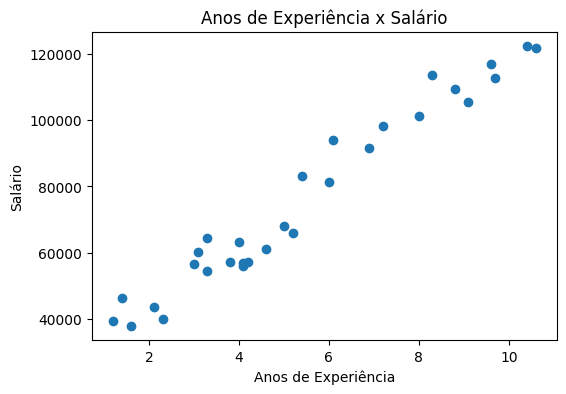

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.title('Anos de Experiência x Salário')
plt.show()

## 4. Separar variáveis explicativas (X) e alvo (y)

In [15]:
# Colunas 'YearsExperience' e 'Salary'
X = df[['YearsExperience']].values  # matriz 2D
y = df['Salary'].values            # vetor 1D
X[:5], y[:5]

(array([[1.2],
        [1.4],
        [1.6],
        [2.1],
        [2.3]]),
 array([39344., 46206., 37732., 43526., 39892.]))

## 5. Dividir em treino e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((24, 1), (6, 1))

## 6. Criar e treinar o modelo de Regressão Linear

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Coeficiente angular (inclinação):', model.coef_[0])
print('Intercepto:', model.intercept_)

Coeficiente angular (inclinação): 9423.81532303098
Intercepto: 24380.20147947369


## 7. Avaliar o modelo

In [12]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MSE: 49830096.855908334
RMSE: 7059.043621901506
R²: 0.9024461774180498


### Visualizar regressão

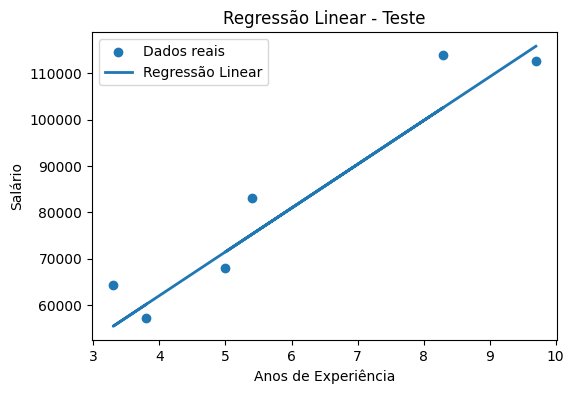

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label='Dados reais')
plt.plot(X_test, y_pred, label='Regressão Linear', linewidth=2)
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.title('Regressão Linear - Teste')
plt.legend()
plt.show()

## 8. Fazer previsão para um novo valor
Exemplo: prever salário para 5 anos de experiência.

In [14]:
anos = np.array([[5]])
salario_previsto = model.predict(anos)
print(f'Salário previsto para 5 anos de experiência: {salario_previsto[0]:.2f}')

Salário previsto para 5 anos de experiência: 71499.28


## 9. Conclusão
- O modelo de **Regressão Linear** é adequado porque há uma relação aproximadamente linear entre anos de experiência e salário.
- Foi avaliado o modelo com **RMSE** e **R²**.
